In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#load in exogenous parameters
f = open("constants/base_params.json")
params = json.load(f)

In [4]:
def generate_ar1(mean, acf, mu, sigma, N):
    data = [mean]
    for i in range(1,N):
        noise = np.random.normal(mu,sigma)
        data.append(mean + acf * (data[-1] - mean) + noise)
    return np.array(data)

In [12]:
#params
beta = params["ar_1_coefficient"]
sigma_eta = params["theta_sigma"]
sigma_epsilon = params["epsilon_sigma"]
l = params["proportion_dogmatic_theta"]
d = params["d"]
a = params["a"]
R = params["R"]
steps = 100



In [32]:
# # vectors
# cum_profits = []
# for iteration in range(30):
#theta
theta = generate_ar1(0, beta, 0, sigma_eta, steps)
theta_t2 = theta[2:]
theta_t1 = theta[1:-1]
theta_t = theta[:-2]
demand = (R/(R - beta))*(1 - l)* ((theta_t1 - theta_t)/ a *sigma_epsilon**2)
demand_2 = (R/(R - beta))*(1 - l)* ((theta_t1)/ a *sigma_epsilon**2)
epsilon = np.random.randn(len(theta_t1))*sigma_epsilon
dividend = d + theta_t1 + epsilon
p_t1 = d / (R-1) + l * (theta_t2 / (R - beta)) + (1 - l) * (theta_t1 / (R - beta))
alt_p_t1 = d / (R-1) + l * (theta_t2 / (R - beta))
alt_pt = d / (R-1) + l * (theta_t1 / (R - beta))
p_t = d / (R-1) + l * (theta_t1 / (R - beta)) + (1 - l) * (theta_t / (R - beta))
profit = (dividend + p_t1 - R * p_t) * demand
profit_2 = (dividend + alt_p_t1 - R * alt_pt) * demand_2
cum_profit = np.cumsum(profit)
cum_profit2 = np.cumsum(profit_2)
#cum_profits.append(cum_profit)

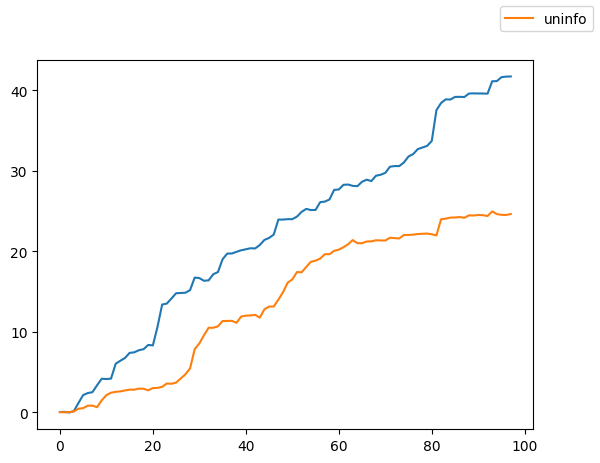

In [35]:
#plot
fig, ax = plt.subplots()
#for vector in cum_profits:
ax.plot(np.asarray(range(len(cum_profit))), cum_profit)
ax.plot(cum_profit2, label = "uninfo")
fig.legend()
plt.show()

In [36]:
#uninfo agent
den_uninfo = a * sigma_epsilon**2 + ((sigma_eta**2) / (1 -beta**2)) * (1 + (beta / (R -beta)))**2
demand_uninfo = - ((R * l * theta_t1) / (R -beta)) / (den_uninfo)
demand_info = (R/(R - beta))*(l)* ((-theta_t1 + theta_t)/ a *sigma_epsilon**2)
profit_uninfo = (dividend + p_t1 - R * p_t) * demand_uninfo
profit_info = (dividend + alt_p_t1 - R * alt_pt) * demand_info
cum_profit_uninfo = np.cumsum(profit_uninfo)
cum_profit_info = np.cumsum(profit_info)

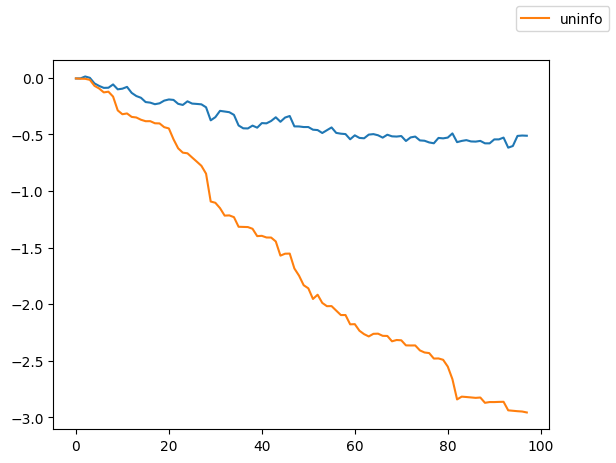

In [37]:
#plot
fig, ax = plt.subplots()
#for vector in cum_profits:
ax.plot(np.asarray(range(len(cum_profit_info))), cum_profit_info)
ax.plot(cum_profit_uninfo, label = "uninfo")
fig.legend()
plt.show()

# Info vs Misinfo

In [11]:
theta = generate_ar1(0, beta, 0, sigma_eta, steps)
theta_t2 = theta[2:]
theta_t1 = theta[1:-1]
theta_t = theta[:-2]
gamma_t1 = np.random.randn(len(theta_t1))
gamma_t2 = np.random.randn(len(theta_t2))
demand = (R/(R - beta))*(l - 1)* ((gamma_t1)/ a *sigma_epsilon**2)
demand_2 = (R/(R - beta))*(l)* ((gamma_t1)/ a *sigma_epsilon**2)
epsilon = np.random.randn(len(theta_t1))*sigma_epsilon
dividend = d + theta_t1 + epsilon
p_t1 = d / (R-1) + l * (theta_t2 / (R - beta)) + (1 - l) * (gamma_t2 / (R - beta))
#alt_p_t1 = d / (R-1) + l * (theta_t2 / (R - beta))
#alt_pt = d / (R-1) + l * (theta_t1 / (R - beta))
p_t = d / (R-1) + l * (theta_t1 / (R - beta)) + (1 - l) * (gamma_t1 / (R - beta))
profit = (dividend + p_t1 - R * p_t) * demand
profit_2 = (dividend + p_t1 - R * p_t) * demand_2
cum_profit = np.cumsum(profit)
cum_profit2 = np.cumsum(profit_2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


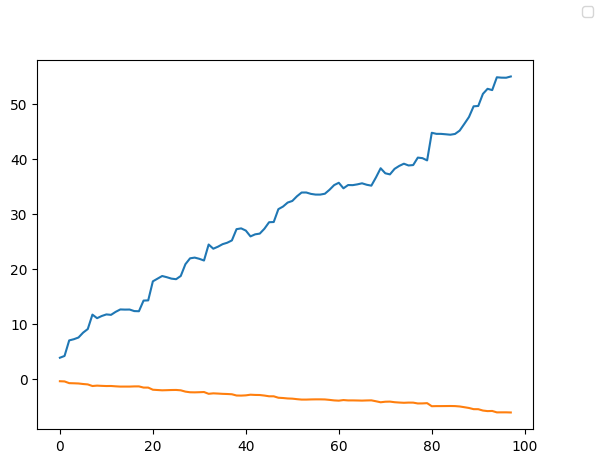

In [12]:
#plot
fig, ax = plt.subplots()
#for vector in cum_profits:
ax.plot(np.asarray(range(len(cum_profit))), cum_profit)
ax.plot(cum_profit2)
fig.legend()
plt.show()

In [14]:
#Compare between uninformed and stale information
F = (sigma_eta**2 / ((1 - beta**2) * sigma_epsilon**2 )) * (1 + beta/(R - beta))**2
C = (1 -l)/(1 + l*F)
L = (R/(R - beta)) * (C/(a * sigma_epsilon**2))
print(F, C, L)
B = (R/(R - beta)) * ((1 - l)/(a * sigma_epsilon**2))
D = (((beta - 1)**2) / (1 - beta**2) + (R - beta + 1)/(R - beta))
profit2 = (1 - l) * (sigma_eta**2) * B * D


profit1 = L*C*(sigma_eta**2)/(1 - beta**2)
print(profit1, profit2)



283.97738147020465 0.03061460019471659 0.051108671399444236
0.005270472560428236 8.778505120803517


In [15]:
def difference_profits(b):
    beta = b
    F = (sigma_eta**2 / ((1 - beta**2) * sigma_epsilon**2 )) * (1 + beta/(R - beta))**2
    C = (1 -l)/(1 + l*F)
    L = (R/(R - beta)) * (C/(a * sigma_epsilon**2))
    B = (R/(R - beta)) * ((1 - l)/(a * sigma_epsilon**2))
    D = (((beta - 1)**2) / (1 - beta**2) + (R - beta + 1)/(R - beta))
    profit2 = (1 - l) * (sigma_eta**2) * B * D
    profit1 = L*C*(sigma_eta**2)/(1 - beta**2)
    return profit2 - profit1



In [25]:
def function_beta(b):
    first = (1 + (l * sigma_eta**2)/((1 - 2 * R * b)*sigma_epsilon**2))**2
    second = (2 * (1 - b) + (1 - b**2)/(R - b))
    return first*second - 1 

In [26]:
np.arange(0.01,0.99,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98])

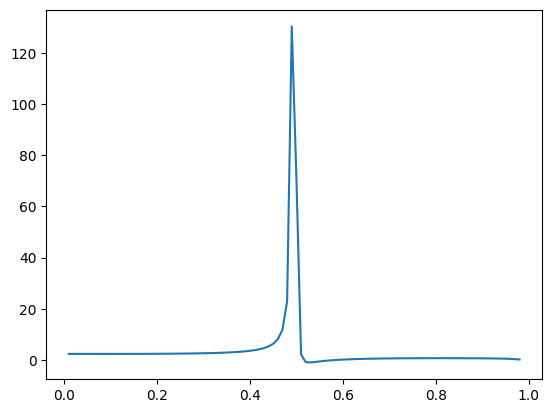

In [27]:
b = np.asarray(np.arange(0.01,0.99,0.01))
X = function_beta(b)
fig,ax = plt.subplots()
ax.plot(b, X)
